In [715]:
#import required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [716]:
# read data
df1=pd.read_csv('beer_sampleSubmission.csv')
df1.head()

,Id,Style
0,0,American IPA
1,1,American IPA
2,2,American IPA
3,3,American IPA
4,4,American IPA


In [717]:
# inspect data
df1.shape

(10314, 2)

In [718]:
# read data
df2=pd.read_csv('beer_train.csv')
df2.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [719]:
df2.shape

(24066, 17)

In [720]:
# read data
df3=pd.read_csv('beer_test.csv')
df3.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,0,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.3,Plato,All Grain,1.00,25.56
1,1,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,2,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
3,3,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.5,Specific Gravity,All Grain,0.50,17.00
4,4,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00


In [721]:
df3.shape

(10314, 16)

In [722]:
# concatenate two datasets
new_beer_test=pd.concat([df1,df3],axis=1)
new_beer_test.head()

,Id,Style,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,0,American IPA,0,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.3,Plato,All Grain,1.00,25.56
1,1,American IPA,1,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,2,American IPA,2,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
3,3,American IPA,3,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.5,Specific Gravity,All Grain,0.50,17.00
4,4,American IPA,4,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00


In [723]:
new_beer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10314 non-null  int64  
 1   Style          10314 non-null  object 
 2   Id             10314 non-null  int64  
 3   Size(L)        10314 non-null  float64
 4   OG             10314 non-null  float64
 5   FG             10314 non-null  float64
 6   ABV            10314 non-null  float64
 7   IBU            10314 non-null  float64
 8   Color          10314 non-null  float64
 9   BoilSize       10314 non-null  float64
 10  BoilTime       10314 non-null  int64  
 11  BoilGravity    9982 non-null   float64
 12  Efficiency     10314 non-null  float64
 13  MashThickness  6148 non-null   float64
 14  SugarScale     10314 non-null  object 
 15  BrewMethod     10314 non-null  object 
 16  PitchRate      4663 non-null   float64
 17  PrimaryTemp    7143 non-null   float64
dtypes: flo

In [724]:
new_beer_test.isnull().sum()

Id                  0
Style               0
Id                  0
Size(L)             0
OG                  0
FG                  0
ABV                 0
IBU                 0
Color               0
BoilSize            0
BoilTime            0
BoilGravity       332
Efficiency          0
MashThickness    4166
SugarScale          0
BrewMethod          0
PitchRate        5651
PrimaryTemp      3171
dtype: int64

### Segregating Null and Non Null values

In [725]:
x_train_1=new_beer_test.dropna()
x_train_1.shape

(2726, 18)

In [726]:
x_train_1.head()

,Id,Style,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,0,American IPA,0,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.30,Plato,All Grain,1.00,25.56
3,3,American IPA,3,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.50,Specific Gravity,All Grain,0.50,17.00
5,5,American IPA,5,18.93,1.0670,1.01100,7.29,45.88,8.06,24.61,60,1.051,75.0,1.50,Specific Gravity,All Grain,1.25,21.11
13,13,American IPA,13,20.82,1.0740,1.02400,6.53,39.17,38.00,26.50,60,1.058,65.0,1.50,Specific Gravity,All Grain,0.75,18.33
20,20,American IPA,20,39.75,1.0560,1.01000,6.00,46.97,5.94,53.94,60,1.041,70.0,1.33,Specific Gravity,All Grain,0.50,20.00


In [727]:
x_train_1.drop('Id',axis=1,inplace=True)

In [728]:
x_train_2=new_beer_test[new_beer_test.isnull().any(axis=1)]
x_train_2.shape

(7588, 18)

In [729]:
x_train_2.head()

,Id,Style,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,1,American IPA,1,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,2,American IPA,2,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
4,4,American IPA,4,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00
6,6,American IPA,6,20.82,1.0620,1.01200,6.48,45.90,4.06,28.39,90,1.045,76.0,1.5,Specific Gravity,All Grain,NaN,18.33
7,7,American IPA,7,68.14,1.0700,1.01600,7.05,55.36,7.33,68.14,10,1.070,75.0,1.5,Specific Gravity,All Grain,NaN,NaN


In [730]:
x_train_2.drop('Id',axis=1,inplace=True)

In [731]:
x_train_2.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,American IPA,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,American IPA,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
4,American IPA,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00
6,American IPA,20.82,1.0620,1.01200,6.48,45.90,4.06,28.39,90,1.045,76.0,1.5,Specific Gravity,All Grain,NaN,18.33
7,American IPA,68.14,1.0700,1.01600,7.05,55.36,7.33,68.14,10,1.070,75.0,1.5,Specific Gravity,All Grain,NaN,NaN


In [732]:
x_train_2.isnull().sum()

Style               0
Size(L)             0
OG                  0
FG                  0
ABV                 0
IBU                 0
Color               0
BoilSize            0
BoilTime            0
BoilGravity       332
Efficiency          0
MashThickness    4166
SugarScale          0
BrewMethod          0
PitchRate        5651
PrimaryTemp      3171
dtype: int64

In [733]:
x_train_3=df2.dropna()
x_train_3.shape

(6373, 17)

In [734]:
x_train_3.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
6,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,Specific Gravity,All Grain,0.35,26.67,Saison
7,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale
9,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA
14,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,62.0,1.50,Specific Gravity,All Grain,1.00,23.89,Saison
15,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,60.0,1.50,Specific Gravity,All Grain,1.25,19.44,American IPA


In [735]:
x_train_3.drop('Id',axis=1,inplace=True)

In [736]:
x_train_4=df2[df2.isnull().any(axis=1)]
x_train_4.shape

(17693, 17)

In [737]:
x_train_4.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [738]:
x_train_4.drop('Id',axis=1,inplace=True)

In [739]:
x_train_4.head()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [740]:
new_beer_train=x_train_1.append(x_train_3)
new_beer_train.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,20.82,15.6465,4.23184,6.21,55.13,8.20,28.01,90,11.800,70.0,1.30,Plato,All Grain,1.00,25.56
3,American IPA,10.00,1.0520,1.01000,5.51,93.58,5.46,28.50,60,1.018,75.0,1.50,Specific Gravity,All Grain,0.50,17.00
5,American IPA,18.93,1.0670,1.01100,7.29,45.88,8.06,24.61,60,1.051,75.0,1.50,Specific Gravity,All Grain,1.25,21.11
13,American IPA,20.82,1.0740,1.02400,6.53,39.17,38.00,26.50,60,1.058,65.0,1.50,Specific Gravity,All Grain,0.75,18.33
20,American IPA,39.75,1.0560,1.01000,6.00,46.97,5.94,53.94,60,1.041,70.0,1.33,Specific Gravity,All Grain,0.50,20.00


In [741]:
new_beer_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9099 entries, 0 to 24056
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Style          9099 non-null   object 
 1   Size(L)        9099 non-null   float64
 2   OG             9099 non-null   float64
 3   FG             9099 non-null   float64
 4   ABV            9099 non-null   float64
 5   IBU            9099 non-null   float64
 6   Color          9099 non-null   float64
 7   BoilSize       9099 non-null   float64
 8   BoilTime       9099 non-null   int64  
 9   BoilGravity    9099 non-null   float64
 10  Efficiency     9099 non-null   float64
 11  MashThickness  9099 non-null   float64
 12  SugarScale     9099 non-null   object 
 13  BrewMethod     9099 non-null   object 
 14  PitchRate      9099 non-null   float64
 15  PrimaryTemp    9099 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 1.2+ MB


In [742]:
new_beer_train.skew()

Size(L)          12.192202
OG                5.770525
FG                6.870801
ABV               4.754969
IBU               3.162087
Color             2.660831
BoilSize         11.736816
BoilTime          1.467334
BoilGravity       5.869488
Efficiency       -1.490034
MashThickness    13.910981
PitchRate         0.914112
PrimaryTemp       2.916429
dtype: float64

In [743]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars=['Size(L)', 'ABV', 'IBU','Color','BoilTime','BoilGravity','Efficiency','MashThickness']
new_beer_train[num_vars]=scaler.fit_transform(new_beer_train[num_vars])
new_beer_train.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,0.003237,15.6465,4.23184,0.124299,0.082079,0.163498,28.01,0.500000,0.556701,0.697581,0.0260,Plato,All Grain,1.00,25.56
3,American IPA,0.001387,1.0520,1.01000,0.110288,0.139324,0.108665,28.50,0.333333,0.000928,0.747984,0.0300,Specific Gravity,All Grain,0.50,17.00
5,American IPA,0.002914,1.0670,1.01100,0.145917,0.068307,0.160696,24.61,0.333333,0.002629,0.747984,0.0300,Specific Gravity,All Grain,1.25,21.11
13,American IPA,0.003237,1.0740,1.02400,0.130705,0.058317,0.759856,26.50,0.333333,0.002990,0.647177,0.0300,Specific Gravity,All Grain,0.75,18.33
20,American IPA,0.006474,1.0560,1.01000,0.120096,0.069930,0.118271,53.94,0.333333,0.002113,0.697581,0.0266,Specific Gravity,All Grain,0.50,20.00


In [744]:
new_beer_train['Size(L)'].value_counts()

0.003237    2274
0.002914     874
0.003560     554
0.006797     395
0.003268     305
            ... 
0.041750       1
0.003613       1
0.004661       1
0.004150       1
0.078335       1
Name: Size(L), Length: 446, dtype: int64

In [745]:
new_beer_train['Size(L)']=round(np.sqrt(new_beer_train['Size(L)']),2)
new_beer_train['OG']=round(np.sqrt(new_beer_train['OG']),2)
new_beer_train['FG']=round(np.sqrt(new_beer_train['FG']),2)
new_beer_train['ABV']=round(np.sqrt(new_beer_train['ABV']),2)
new_beer_train['IBU']=round(np.sqrt(new_beer_train['IBU']),2)
new_beer_train['Color']=round(np.sqrt(new_beer_train['Color']),2)
new_beer_train['BoilSize']=round(np.sqrt(new_beer_train['BoilSize']),2)
new_beer_train['BoilTime']=round(np.sqrt(new_beer_train['BoilTime']),2)
new_beer_train['BoilGravity']=round(np.sqrt(new_beer_train['BoilGravity']),2)
new_beer_train['Efficiency']=round(np.sqrt(new_beer_train['Efficiency']),2)
new_beer_train['MashThickness']=round(np.sqrt(new_beer_train['MashThickness']),2)
new_beer_train['PrimaryTemp']=round(np.sqrt(new_beer_train['PrimaryTemp']),2)

In [746]:
new_beer_train

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,0.06,3.96,2.06,0.35,0.29,0.40,5.29,0.71,0.75,0.84,0.16,Plato,All Grain,1.00,5.06
3,American IPA,0.04,1.03,1.00,0.33,0.37,0.33,5.34,0.58,0.03,0.86,0.17,Specific Gravity,All Grain,0.50,4.12
5,American IPA,0.05,1.03,1.01,0.38,0.26,0.40,4.96,0.58,0.05,0.86,0.17,Specific Gravity,All Grain,1.25,4.59
13,American IPA,0.06,1.04,1.01,0.36,0.24,0.87,5.15,0.58,0.05,0.80,0.17,Specific Gravity,All Grain,0.75,4.28
20,American IPA,0.08,1.03,1.00,0.35,0.26,0.34,7.34,0.58,0.05,0.84,0.16,Specific Gravity,All Grain,0.50,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24036,American IPA,0.06,1.03,1.01,0.36,0.17,0.28,5.33,0.58,0.05,0.89,0.17,Specific Gravity,All Grain,1.25,4.47
24038,American IPA,0.31,1.03,1.00,0.35,0.19,0.32,24.70,0.58,0.05,0.93,0.23,Specific Gravity,All Grain,0.35,4.42
24041,American IPA,0.06,1.03,1.01,0.37,0.31,0.40,4.96,0.58,0.05,0.80,0.15,Specific Gravity,All Grain,0.35,4.47
24048,American IPA,0.06,1.03,1.01,0.34,0.40,0.35,6.15,0.71,0.04,0.84,0.16,Specific Gravity,All Grain,0.35,4.47


In [747]:
new_beer_train.skew()

Size(L)          6.660090
OG               5.576183
FG               6.235488
ABV              0.604794
IBU              0.874675
Color            1.764344
BoilSize         6.722342
BoilTime         0.396236
BoilGravity      5.549348
Efficiency      -2.614001
MashThickness    4.248950
PitchRate        0.914112
PrimaryTemp      3.240893
dtype: float64

In [748]:
new_beer_train['Size(L)']=round(np.sqrt(new_beer_train['Size(L)']),2)
new_beer_train['OG']=round(np.sqrt(new_beer_train['OG']),2)
new_beer_train['FG']=round(np.sqrt(new_beer_train['FG']),2)
new_beer_train['Color']=round(np.sqrt(new_beer_train['Color']),2)
new_beer_train['BoilSize']=round(np.sqrt(new_beer_train['BoilSize']),2)
new_beer_train['BoilGravity']=round(np.sqrt(new_beer_train['BoilGravity']),2)
new_beer_train['MashThickness']=round(np.sqrt(new_beer_train['MashThickness']),2)


In [749]:
new_beer_train.skew()

Size(L)          4.409062
OG               5.519950
FG               6.034993
ABV              0.604794
IBU              0.874675
Color            1.288097
BoilSize         4.779416
BoilTime         0.396236
BoilGravity      5.365555
Efficiency      -2.614001
MashThickness    2.099968
PitchRate        0.914112
PrimaryTemp      3.240893
dtype: float64

In [750]:
new_beer_train.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,0.24,1.99,1.44,0.35,0.29,0.63,2.30,0.71,0.87,0.84,0.40,Plato,All Grain,1.00,5.06
3,American IPA,0.20,1.01,1.00,0.33,0.37,0.57,2.31,0.58,0.17,0.86,0.41,Specific Gravity,All Grain,0.50,4.12
5,American IPA,0.22,1.01,1.00,0.38,0.26,0.63,2.23,0.58,0.22,0.86,0.41,Specific Gravity,All Grain,1.25,4.59
13,American IPA,0.24,1.02,1.00,0.36,0.24,0.93,2.27,0.58,0.22,0.80,0.41,Specific Gravity,All Grain,0.75,4.28
20,American IPA,0.28,1.01,1.00,0.35,0.26,0.58,2.71,0.58,0.22,0.84,0.40,Specific Gravity,All Grain,0.50,4.47


In [751]:
new_beer_train['Size(L)']=round(np.sqrt(new_beer_train['Size(L)']),2)
new_beer_train['OG']=round(np.sqrt(new_beer_train['OG']),2)
new_beer_train['FG']=round(np.sqrt(new_beer_train['FG']),2)
new_beer_train['Color']=round(np.sqrt(new_beer_train['Color']),2)
new_beer_train['BoilSize']=round(np.sqrt(new_beer_train['BoilSize']),2)
new_beer_train['BoilGravity']=round(np.sqrt(new_beer_train['BoilGravity']),2)
new_beer_train['MashThickness']=round(np.sqrt(new_beer_train['MashThickness']),2)


In [752]:
new_beer_train.skew()

Size(L)          3.142152
OG               5.483102
FG               5.960718
ABV              0.604794
IBU              0.874675
Color            0.834195
BoilSize         3.806517
BoilTime         0.396236
BoilGravity      5.065189
Efficiency      -2.614001
MashThickness    0.926624
PitchRate        0.914112
PrimaryTemp      3.240893
dtype: float64

In [753]:
new_beer_train.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,0.49,1.41,1.2,0.35,0.29,0.79,1.52,0.71,0.93,0.84,0.63,Plato,All Grain,1.00,5.06
3,American IPA,0.45,1.00,1.0,0.33,0.37,0.75,1.52,0.58,0.41,0.86,0.64,Specific Gravity,All Grain,0.50,4.12
5,American IPA,0.47,1.00,1.0,0.38,0.26,0.79,1.49,0.58,0.47,0.86,0.64,Specific Gravity,All Grain,1.25,4.59
13,American IPA,0.49,1.01,1.0,0.36,0.24,0.96,1.51,0.58,0.47,0.80,0.64,Specific Gravity,All Grain,0.75,4.28
20,American IPA,0.53,1.00,1.0,0.35,0.26,0.76,1.65,0.58,0.47,0.84,0.63,Specific Gravity,All Grain,0.50,4.47


In [754]:
new_beer_train.Efficiency.value_counts()

0.84    2981
0.86    1963
0.80     739
0.89     649
0.85     571
0.77     386
0.82     336
0.88     289
0.92     218
0.79     136
0.59     100
0.74      89
0.90      85
0.81      81
0.87      77
0.83      63
0.70      50
0.95      40
0.93      38
0.91      36
0.75      25
0.76      24
0.78      18
0.73      15
0.94      15
0.96      11
0.67       8
0.97       7
0.72       6
0.68       5
0.64       5
0.63       5
0.49       4
1.00       4
0.71       3
0.69       3
0.99       2
0.54       2
0.62       2
0.98       2
0.00       1
0.47       1
0.60       1
0.61       1
0.65       1
0.66       1
Name: Efficiency, dtype: int64

In [755]:
new_beer_train.BoilGravity.value_counts()

0.47    5803
0.45    1842
0.49    1003
0.51      78
0.92      67
0.41      64
0.94      46
0.93      39
0.91      30
0.96      24
0.95      23
0.90      12
0.89      10
0.53       9
0.97       9
0.37       6
0.32       5
0.88       5
0.98       4
0.55       3
0.00       3
0.57       3
0.63       2
0.86       2
0.99       2
0.83       2
1.00       1
0.85       1
0.87       1
Name: BoilGravity, dtype: int64

In [756]:
new_beer_train.BoilSize.value_counts()

1.52    2485
1.51     983
1.49     705
1.53     591
1.50     443
        ... 
2.66       1
2.80       1
2.67       1
2.38       1
2.69       1
Name: BoilSize, Length: 151, dtype: int64

In [757]:
new_beer_train.MashThickness.value_counts()

0.64    3427
0.63    1861
0.70    1489
0.69     602
0.71     447
0.67     221
0.73     197
0.62     175
0.66     142
0.65     124
0.61     112
0.75      81
0.74      45
0.72      42
0.68      40
0.77      13
0.60      10
0.76       9
0.59       8
0.79       8
0.92       4
0.87       4
0.57       4
0.80       3
0.81       3
0.78       3
0.91       3
0.85       2
0.82       2
0.94       2
0.88       2
0.89       2
1.00       2
0.53       2
0.86       1
0.98       1
0.97       1
0.47       1
0.83       1
0.95       1
0.90       1
0.00       1
Name: MashThickness, dtype: int64

In [758]:
new_beer_train['Size(L)'].value_counts()

0.49    4928
0.47    1223
0.53    1027
0.55     469
0.45     347
0.57     239
0.51     213
0.37     128
0.41      77
0.59      69
0.60      37
0.61      31
0.64      27
0.62      22
0.72      21
0.81      19
0.73      19
0.75      18
0.82      14
0.80      14
0.71      14
0.63      13
0.84      13
0.79      12
0.87      11
0.68      11
0.65      10
0.69       9
0.78       9
0.86       9
0.83       6
0.67       5
0.70       5
0.76       4
0.89       4
0.85       3
0.74       2
0.88       2
0.94       2
0.66       2
0.90       2
0.32       2
0.92       2
0.95       1
0.98       1
0.77       1
1.00       1
0.00       1
Name: Size(L), dtype: int64

In [759]:
new_beer_train['Size(L)']=round(np.sqrt(new_beer_train['Size(L)']),2)
new_beer_train['OG']=round(np.sqrt(new_beer_train['OG']),2)
new_beer_train['FG']=round(np.sqrt(new_beer_train['FG']),2)
new_beer_train['BoilSize']=round(np.sqrt(new_beer_train['BoilSize']),2)
new_beer_train['BoilGravity']=round(np.sqrt(new_beer_train['BoilGravity']),2)


In [760]:
new_beer_train.skew()

Size(L)          1.901010
OG               5.499787
FG               5.960104
ABV              0.604794
IBU              0.874675
Color            0.834195
BoilSize         3.294222
BoilTime         0.396236
BoilGravity      3.697640
Efficiency      -2.614001
MashThickness    0.926624
PitchRate        0.914112
PrimaryTemp      3.240893
dtype: float64

In [761]:
new_beer_train['Size(L)'].value_counts()

0.70    4928
0.69    1223
0.73    1027
0.74     469
0.67     347
0.75     239
0.71     213
0.61     128
0.77     106
0.64      77
0.85      40
0.79      35
0.78      31
0.80      27
0.89      26
0.87      22
0.91      20
0.93      20
0.90      19
0.84      19
0.92      16
0.82      16
0.81      12
0.88      10
0.83       9
0.94       6
0.97       3
0.86       2
0.57       2
0.96       2
0.95       2
1.00       1
0.99       1
0.00       1
Name: Size(L), dtype: int64

In [762]:
new_beer_train.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,0.70,1.19,1.1,0.35,0.29,0.79,1.23,0.71,0.96,0.84,0.63,Plato,All Grain,1.00,5.06
3,American IPA,0.67,1.00,1.0,0.33,0.37,0.75,1.23,0.58,0.64,0.86,0.64,Specific Gravity,All Grain,0.50,4.12
5,American IPA,0.69,1.00,1.0,0.38,0.26,0.79,1.22,0.58,0.69,0.86,0.64,Specific Gravity,All Grain,1.25,4.59
13,American IPA,0.70,1.00,1.0,0.36,0.24,0.96,1.23,0.58,0.69,0.80,0.64,Specific Gravity,All Grain,0.75,4.28
20,American IPA,0.73,1.00,1.0,0.35,0.26,0.76,1.28,0.58,0.69,0.84,0.63,Specific Gravity,All Grain,0.50,4.47


In [763]:
new_beer_train.shape

(9099, 16)

In [764]:
new_beer_train.isnull().sum()

Style             0
Size(L)           0
OG                0
FG                0
ABV               0
IBU               0
Color             0
BoilSize          0
BoilTime          0
BoilGravity       0
Efficiency        0
MashThickness     0
SugarScale        0
BrewMethod        0
PitchRate         0
PrimaryTemp      27
dtype: int64

In [765]:
new_beer_test_1=x_train_2.append(x_train_4)
new_beer_test_1.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,American IPA,20.82,1.0570,1.01300,5.71,51.99,6.35,28.39,60,1.042,70.0,NaN,Specific Gravity,All Grain,1.25,NaN
2,American IPA,22.71,1.0580,1.01400,5.67,54.77,24.75,28.39,60,1.046,75.0,1.5,Specific Gravity,All Grain,NaN,20.00
4,American IPA,20.00,12.0478,1.32023,5.70,33.72,3.58,30.00,60,8.100,75.0,3.0,Plato,All Grain,NaN,27.00
6,American IPA,20.82,1.0620,1.01200,6.48,45.90,4.06,28.39,90,1.045,76.0,1.5,Specific Gravity,All Grain,NaN,18.33
7,American IPA,68.14,1.0700,1.01600,7.05,55.36,7.33,68.14,10,1.070,75.0,1.5,Specific Gravity,All Grain,NaN,NaN


In [766]:
new_beer_test_1.shape

(25281, 16)

### EDA on Dataset

<AxesSubplot:xlabel='Style'>

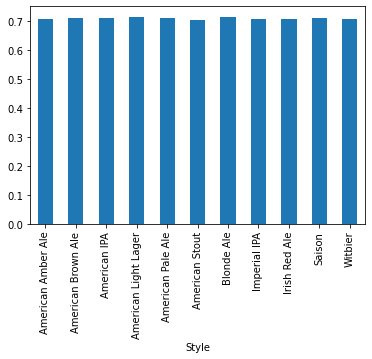

In [767]:
new_beer_train.groupby('Style')['Size(L)'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

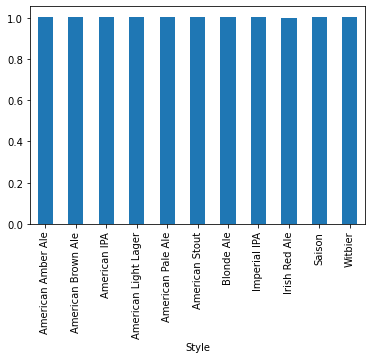

In [768]:
new_beer_train.groupby('Style')['OG'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

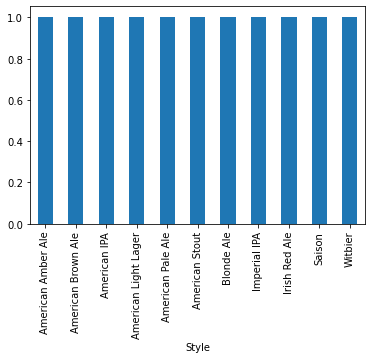

In [769]:
new_beer_train.groupby('Style')['FG'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

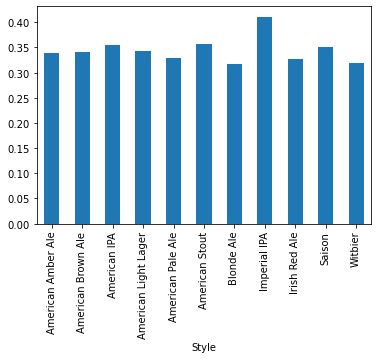

In [770]:
new_beer_train.groupby('Style')['ABV'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

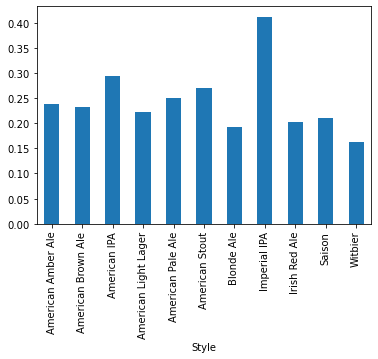

In [771]:
new_beer_train.groupby('Style')['IBU'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

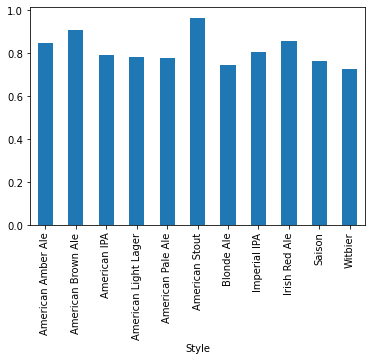

In [772]:
new_beer_train.groupby('Style')['Color'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

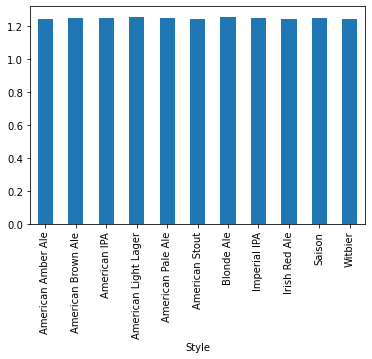

In [773]:
new_beer_train.groupby('Style')['BoilSize'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

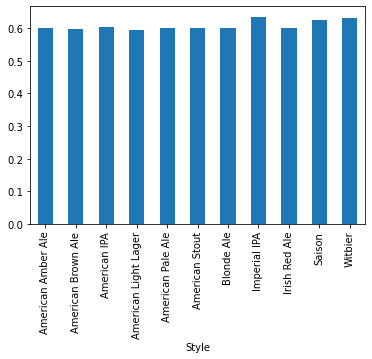

In [774]:
new_beer_train.groupby('Style')['BoilTime'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

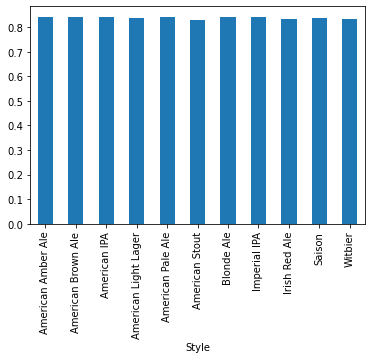

In [775]:
new_beer_train.groupby('Style')['Efficiency'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

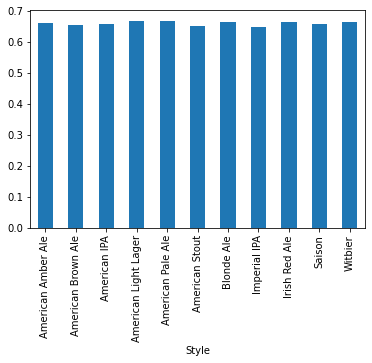

In [776]:
new_beer_train.groupby('Style')['MashThickness'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

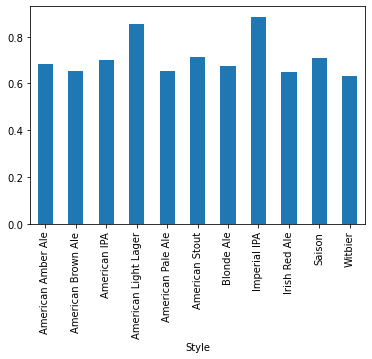

In [777]:
new_beer_train.groupby('Style')['PitchRate'].mean().plot.bar()

<AxesSubplot:xlabel='Style'>

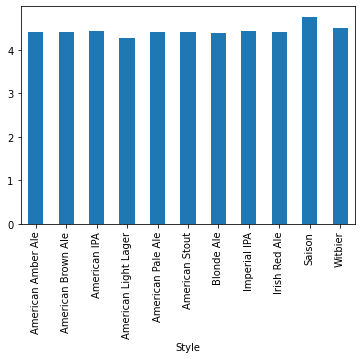

In [778]:
new_beer_train.groupby('Style')['PrimaryTemp'].mean().plot.bar()

In [779]:
new_beer_train.skew()

Size(L)          1.901010
OG               5.499787
FG               5.960104
ABV              0.604794
IBU              0.874675
Color            0.834195
BoilSize         3.294222
BoilTime         0.396236
BoilGravity      3.697640
Efficiency      -2.614001
MashThickness    0.926624
PitchRate        0.914112
PrimaryTemp      3.240893
dtype: float64

In [780]:
new_beer_test_1.isnull().sum()

Style                0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1268
Efficiency           0
MashThickness    14032
SugarScale           0
BrewMethod           0
PitchRate        18785
PrimaryTemp      10659
dtype: int64

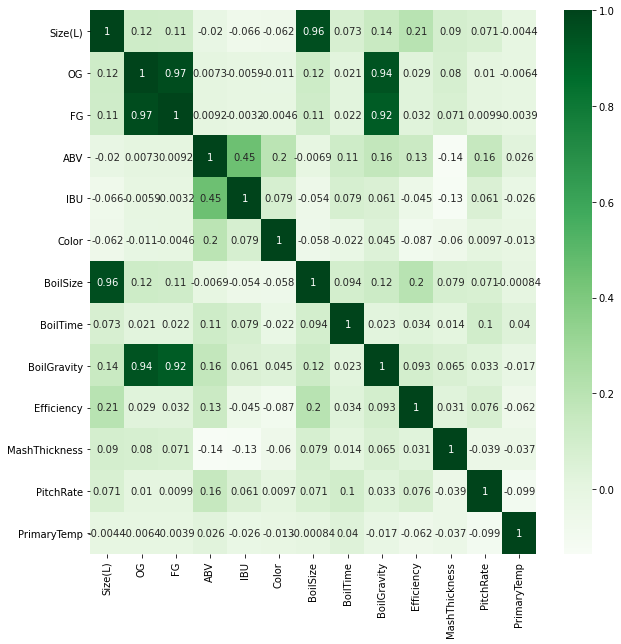

In [781]:
plt.figure(figsize=[10,10])
sns.heatmap(new_beer_train.corr(),annot=True,cmap='Greens')
plt.show()

In [782]:
new_beer_train=new_beer_train.drop(['BoilSize','OG','FG'],axis=1)
new_beer_train.head()

,Style,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,American IPA,0.70,0.35,0.29,0.79,0.71,0.96,0.84,0.63,Plato,All Grain,1.00,5.06
3,American IPA,0.67,0.33,0.37,0.75,0.58,0.64,0.86,0.64,Specific Gravity,All Grain,0.50,4.12
5,American IPA,0.69,0.38,0.26,0.79,0.58,0.69,0.86,0.64,Specific Gravity,All Grain,1.25,4.59
13,American IPA,0.70,0.36,0.24,0.96,0.58,0.69,0.80,0.64,Specific Gravity,All Grain,0.75,4.28
20,American IPA,0.73,0.35,0.26,0.76,0.58,0.69,0.84,0.63,Specific Gravity,All Grain,0.50,4.47


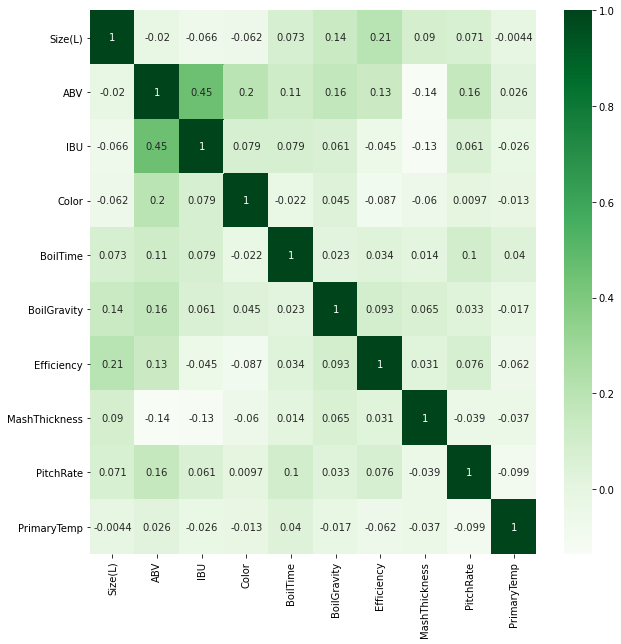

In [783]:
plt.figure(figsize=[10,10])
sns.heatmap(new_beer_train.corr(),annot=True,cmap='Greens')
plt.show()

### Converting Categorical Values to Numerical Values

In [784]:
status3 = pd.get_dummies(new_beer_train['Style'], drop_first = True)
new_beer_train = pd.concat([new_beer_train, status3], axis = 1)
new_beer_train.head()

,Style,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,American IPA,0.70,0.35,0.29,0.79,0.71,0.96,0.84,0.63,Plato,...,0,1,0,0,0,0,0,0,0,0
3,American IPA,0.67,0.33,0.37,0.75,0.58,0.64,0.86,0.64,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
5,American IPA,0.69,0.38,0.26,0.79,0.58,0.69,0.86,0.64,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
13,American IPA,0.70,0.36,0.24,0.96,0.58,0.69,0.80,0.64,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
20,American IPA,0.73,0.35,0.26,0.76,0.58,0.69,0.84,0.63,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0


In [785]:
new_beer_train=new_beer_train.drop(['Style'],axis=1)
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,0.70,0.35,0.29,0.79,0.71,0.96,0.84,0.63,Plato,All Grain,...,0,1,0,0,0,0,0,0,0,0
3,0.67,0.33,0.37,0.75,0.58,0.64,0.86,0.64,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
5,0.69,0.38,0.26,0.79,0.58,0.69,0.86,0.64,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
13,0.70,0.36,0.24,0.96,0.58,0.69,0.80,0.64,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
20,0.73,0.35,0.26,0.76,0.58,0.69,0.84,0.63,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0


In [786]:
new_beer_train['SugarScale'].value_counts()
new_beer_train['SugarScale']=new_beer_train['SugarScale'].replace('Specific Gravity',0)
new_beer_train['SugarScale']=new_beer_train['SugarScale'].replace('Plato',1)

In [787]:
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,0.70,0.35,0.29,0.79,0.71,0.96,0.84,0.63,1,All Grain,...,0,1,0,0,0,0,0,0,0,0
3,0.67,0.33,0.37,0.75,0.58,0.64,0.86,0.64,0,All Grain,...,0,1,0,0,0,0,0,0,0,0
5,0.69,0.38,0.26,0.79,0.58,0.69,0.86,0.64,0,All Grain,...,0,1,0,0,0,0,0,0,0,0
13,0.70,0.36,0.24,0.96,0.58,0.69,0.80,0.64,0,All Grain,...,0,1,0,0,0,0,0,0,0,0
20,0.73,0.35,0.26,0.76,0.58,0.69,0.84,0.63,0,All Grain,...,0,1,0,0,0,0,0,0,0,0


In [788]:
new_beer_train['BrewMethod'].value_counts()
new_beer_train['BrewMethod']=new_beer_train['BrewMethod'].replace('All Grain',1)

In [789]:
new_beer_train.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
0,0.70,0.35,0.29,0.79,0.71,0.96,0.84,0.63,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.67,0.33,0.37,0.75,0.58,0.64,0.86,0.64,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0.69,0.38,0.26,0.79,0.58,0.69,0.86,0.64,0,1,...,0,1,0,0,0,0,0,0,0,0
13,0.70,0.36,0.24,0.96,0.58,0.69,0.80,0.64,0,1,...,0,1,0,0,0,0,0,0,0,0
20,0.73,0.35,0.26,0.76,0.58,0.69,0.84,0.63,0,1,...,0,1,0,0,0,0,0,0,0,0


In [790]:
y_train = new_beer_train.pop('BoilGravity')
X_train = new_beer_train


In [791]:
X_train.isnull().sum()

Size(L)                  0
ABV                      0
IBU                      0
Color                    0
BoilTime                 0
Efficiency               0
MashThickness            0
SugarScale               0
BrewMethod               0
PitchRate                0
PrimaryTemp             27
American Brown Ale       0
American IPA             0
American Light Lager     0
American Pale Ale        0
American Stout           0
Blonde Ale               0
Imperial IPA             0
Irish Red Ale            0
Saison                   0
Witbier                  0
dtype: int64

In [792]:
X_train['PrimaryTemp']=X_train['PrimaryTemp'].fillna(X_train['PrimaryTemp'].mean())

In [793]:
X_train.isnull().sum()

Size(L)                 0
ABV                     0
IBU                     0
Color                   0
BoilTime                0
Efficiency              0
MashThickness           0
SugarScale              0
BrewMethod              0
PitchRate               0
PrimaryTemp             0
American Brown Ale      0
American IPA            0
American Light Lager    0
American Pale Ale       0
American Stout          0
Blonde Ale              0
Imperial IPA            0
Irish Red Ale           0
Saison                  0
Witbier                 0
dtype: int64

### Recursive Feature Elimination

In [794]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [795]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [796]:
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [797]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Size(L)', True, 1),
 ('ABV', True, 1),
 ('IBU', False, 6),
 ('Color', True, 1),
 ('BoilTime', True, 1),
 ('Efficiency', True, 1),
 ('MashThickness', True, 1),
 ('SugarScale', True, 1),
 ('BrewMethod', False, 12),
 ('PitchRate', False, 11),
 ('PrimaryTemp', False, 4),
 ('American Brown Ale', False, 3),
 ('American IPA', False, 9),
 ('American Light Lager', True, 1),
 ('American Pale Ale', False, 7),
 ('American Stout', True, 1),
 ('Blonde Ale', False, 5),
 ('Imperial IPA', True, 1),
 ('Irish Red Ale', False, 10),
 ('Saison', False, 8),
 ('Witbier', False, 2)]

In [798]:
col = X_train.columns[rfe.support_]
col

Index(['Size(L)', 'ABV', 'Color', 'BoilTime', 'Efficiency', 'MashThickness',
       'SugarScale', 'American Light Lager', 'American Stout', 'Imperial IPA'],
      dtype='object')

In [799]:
X_train.columns[~rfe.support_]

Index(['IBU', 'BrewMethod', 'PitchRate', 'PrimaryTemp', 'American Brown Ale',
       'American IPA', 'American Pale Ale', 'Blonde Ale', 'Irish Red Ale',
       'Saison', 'Witbier'],
      dtype='object')

In [800]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [801]:
### Linear Regression using OLS

In [802]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [803]:
# Running a linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [804]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:16:54   Log-Likelihood:                 25932.
No. Observations:                9099   AIC:                        -5.184e+04
Df Residuals:                    9088   BIC:                        -5.176e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5207 

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,126.15
2,ABV,1.11
10,American Pale Ale,1.07
1,Size(L),1.04
3,Color,1.04
5,Efficiency,1.04
8,PitchRate,1.04
4,BoilTime,1.03
7,SugarScale,1.02
6,MashThickness,1.01


In [68]:
X_train_new = X_train_rfe.drop(["MashThickness"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.159e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:59:37   Log-Likelihood:                 22225.
No. Observations:                9099   AIC:                        -4.443e+04
Df Residuals:                    9089   BIC:                        -4.436e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0178 

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Acceptable Model with all features significant and VIF value less than 5

,Features,VIF
0,const,124.41
2,ABV,1.10
9,American Pale Ale,1.06
3,Color,1.04
5,Efficiency,1.04
7,PitchRate,1.04
1,Size(L),1.03
4,BoilTime,1.03
6,SugarScale,1.02
8,American Light Lager,1.01


In [70]:
X_train_new1 = X_train_new.drop(["BoilTime"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.429e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:59:42   Log-Likelihood:                 22225.
No. Observations:                9099   AIC:                        -4.443e+04
Df Residuals:                    9090   BIC:                        -4.437e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0170 

In [71]:
X_train_new2 = X_train_new1.drop(["Color"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.776e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:59:44   Log-Likelihood:                 22224.
No. Observations:                9099   AIC:                        -4.443e+04
Df Residuals:                    9091   BIC:                        -4.437e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0165 

In [72]:
y_train_cnt = lm.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

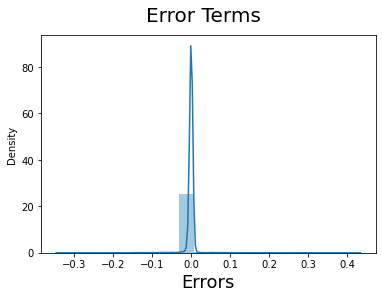

In [73]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [74]:
new_beer_test_1.isnull().sum()

Style                0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1268
Efficiency           0
MashThickness    14032
SugarScale           0
BrewMethod           0
PitchRate        18785
PrimaryTemp      10659
dtype: int64

In [75]:
new_beer_test_1['PitchRate']=new_beer_test_1['PitchRate'].fillna(new_beer_test_1['PitchRate'].mean())

In [76]:
new_beer_test_1.isnull().sum()

Style                0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1268
Efficiency           0
MashThickness    14032
SugarScale           0
BrewMethod           0
PitchRate            0
PrimaryTemp      10659
dtype: int64

In [77]:
new_beer_test_1['MashThickness']=new_beer_test_1['MashThickness'].fillna(new_beer_test_1['MashThickness'].mean())

In [78]:
new_beer_test_1.isnull().sum()

Style                0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1268
Efficiency           0
MashThickness        0
SugarScale           0
BrewMethod           0
PitchRate            0
PrimaryTemp      10659
dtype: int64

In [79]:
new_beer_test_1['PrimaryTemp']=new_beer_test_1['PrimaryTemp'].fillna(new_beer_test_1['PrimaryTemp'].mean())

In [80]:
new_beer_test_1.isnull().sum()

Style               0
Size(L)             0
OG                  0
FG                  0
ABV                 0
IBU                 0
Color               0
BoilSize            0
BoilTime            0
BoilGravity      1268
Efficiency          0
MashThickness       0
SugarScale          0
BrewMethod          0
PitchRate           0
PrimaryTemp         0
dtype: int64

In [81]:
new_beer_test_1['BoilGravity']=new_beer_test_1['BoilGravity'].fillna(new_beer_test_1['BoilGravity'].mean())

In [82]:
new_beer_test_1.isnull().sum()

Style            0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

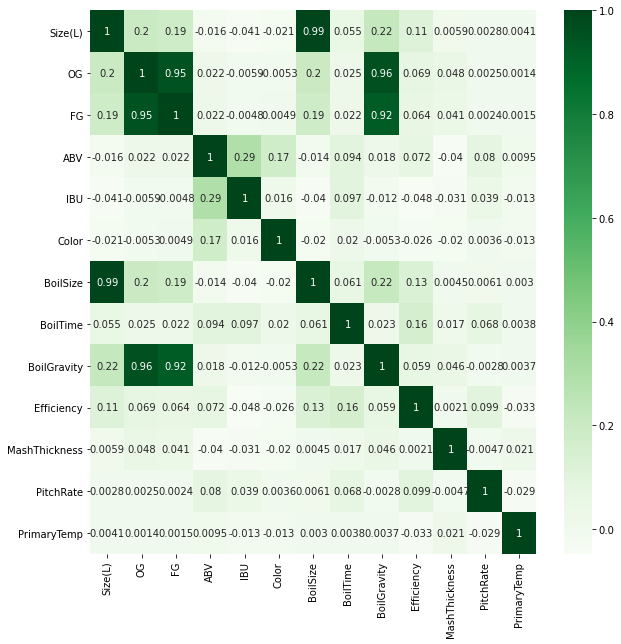

In [83]:
plt.figure(figsize=[10,10])
sns.heatmap(new_beer_test_1.corr(),annot=True,cmap='Greens')
plt.show()

In [84]:
new_beer_test_1=new_beer_test_1.drop(['BoilSize','OG','FG'],axis=1)
new_beer_test_1.head()

,Style,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1,American IPA,20.82,5.71,51.99,6.35,60,1.042,70.0,2.171791,Specific Gravity,All Grain,1.250000,19.796722
2,American IPA,22.71,5.67,54.77,24.75,60,1.046,75.0,1.500000,Specific Gravity,All Grain,0.648576,20.000000
4,American IPA,20.00,5.70,33.72,3.58,60,8.100,75.0,3.000000,Plato,All Grain,0.648576,27.000000
6,American IPA,20.82,6.48,45.90,4.06,90,1.045,76.0,1.500000,Specific Gravity,All Grain,0.648576,18.330000
7,American IPA,68.14,7.05,55.36,7.33,10,1.070,75.0,1.500000,Specific Gravity,All Grain,0.648576,19.796722


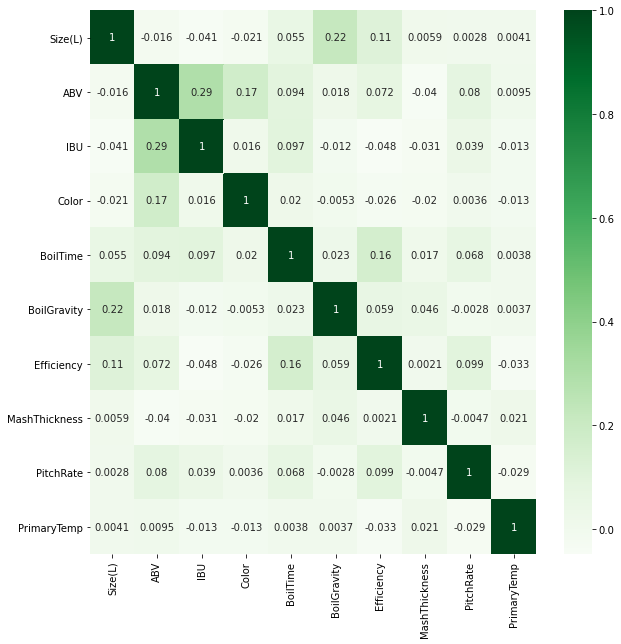

In [85]:
plt.figure(figsize=[10,10])
sns.heatmap(new_beer_test_1.corr(),annot=True,cmap='Greens')
plt.show()

In [86]:
status33 = pd.get_dummies(new_beer_test_1['Style'], drop_first = True)
new_beer_test_1 = pd.concat([new_beer_test_1, status33], axis = 1)
new_beer_test_1.head()

,Style,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
1,American IPA,20.82,5.71,51.99,6.35,60,1.042,70.0,2.171791,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
2,American IPA,22.71,5.67,54.77,24.75,60,1.046,75.0,1.500000,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
4,American IPA,20.00,5.70,33.72,3.58,60,8.100,75.0,3.000000,Plato,...,0,1,0,0,0,0,0,0,0,0
6,American IPA,20.82,6.48,45.90,4.06,90,1.045,76.0,1.500000,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0
7,American IPA,68.14,7.05,55.36,7.33,10,1.070,75.0,1.500000,Specific Gravity,...,0,1,0,0,0,0,0,0,0,0


In [87]:
new_beer_test_1=new_beer_test_1.drop(['Style'],axis=1)
new_beer_test_1.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
1,20.82,5.71,51.99,6.35,60,1.042,70.0,2.171791,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
2,22.71,5.67,54.77,24.75,60,1.046,75.0,1.500000,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
4,20.00,5.70,33.72,3.58,60,8.100,75.0,3.000000,Plato,All Grain,...,0,1,0,0,0,0,0,0,0,0
6,20.82,6.48,45.90,4.06,90,1.045,76.0,1.500000,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0
7,68.14,7.05,55.36,7.33,10,1.070,75.0,1.500000,Specific Gravity,All Grain,...,0,1,0,0,0,0,0,0,0,0


In [88]:
new_beer_test_1['SugarScale'].value_counts()
new_beer_test_1['SugarScale']=new_beer_test_1['SugarScale'].replace('Specific Gravity',0)
new_beer_test_1['SugarScale']=new_beer_test_1['SugarScale'].replace('Plato',1)

In [89]:
new_beer_test_1['BrewMethod'].value_counts()
new_beer_test_1['BrewMethod']=new_beer_test_1['BrewMethod'].replace('All Grain',1)

In [90]:
new_beer_test_1.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
1,20.82,5.71,51.99,6.35,60,1.042,70.0,2.171791,0,1,...,0,1,0,0,0,0,0,0,0,0
2,22.71,5.67,54.77,24.75,60,1.046,75.0,1.500000,0,1,...,0,1,0,0,0,0,0,0,0,0
4,20.00,5.70,33.72,3.58,60,8.100,75.0,3.000000,1,1,...,0,1,0,0,0,0,0,0,0,0
6,20.82,6.48,45.90,4.06,90,1.045,76.0,1.500000,0,1,...,0,1,0,0,0,0,0,0,0,0
7,68.14,7.05,55.36,7.33,10,1.070,75.0,1.500000,0,1,...,0,1,0,0,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [92]:
num_vars=['Size(L)', 'ABV', 'IBU','Color','BoilTime','BoilGravity','Efficiency','MashThickness']
new_beer_test_1[num_vars]=scaler.fit_transform(new_beer_test_1[num_vars])
new_beer_test_1.head()

,Size(L),ABV,IBU,Color,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,...,American Brown Ale,American IPA,American Light Lager,American Pale Ale,American Stout,Blonde Ale,Imperial IPA,Irish Red Ale,Saison,Witbier
1,0.003249,0.104349,0.023663,0.058445,0.250000,0.027135,0.70,0.028800,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.003558,0.103618,0.024929,0.227796,0.250000,0.027240,0.75,0.018074,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0.003114,0.104167,0.015348,0.032950,0.250000,0.210938,0.75,0.042023,1,1,...,0,1,0,0,0,0,0,0,0,0
6,0.003249,0.118421,0.020891,0.037368,0.375000,0.027214,0.76,0.018074,0,1,...,0,1,0,0,0,0,0,0,0,0
7,0.011005,0.128838,0.025197,0.067464,0.041667,0.027865,0.75,0.018074,0,1,...,0,1,0,0,0,0,0,0,0,0


In [93]:
new_beer_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25281 entries, 1 to 24065
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Size(L)               25281 non-null  float64
 1   ABV                   25281 non-null  float64
 2   IBU                   25281 non-null  float64
 3   Color                 25281 non-null  float64
 4   BoilTime              25281 non-null  float64
 5   BoilGravity           25281 non-null  float64
 6   Efficiency            25281 non-null  float64
 7   MashThickness         25281 non-null  float64
 8   SugarScale            25281 non-null  int64  
 9   BrewMethod            25281 non-null  object 
 10  PitchRate             25281 non-null  float64
 11  PrimaryTemp           25281 non-null  float64
 12  American Brown Ale    25281 non-null  uint8  
 13  American IPA          25281 non-null  uint8  
 14  American Light Lager  25281 non-null  uint8  
 15  American Pale Ale  

In [94]:
new_beer_test_1=new_beer_test_1.drop('BrewMethod',axis=1)

In [95]:
y_test = new_beer_test_1.pop('BoilGravity')
X_test = new_beer_test_1


In [96]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [97]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_test, y_test)

LinearRegression()

In [98]:
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_test, y_test)

In [99]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('Size(L)', True, 1),
 ('ABV', True, 1),
 ('IBU', True, 1),
 ('Color', True, 1),
 ('BoilTime', True, 1),
 ('Efficiency', True, 1),
 ('MashThickness', True, 1),
 ('SugarScale', True, 1),
 ('PitchRate', True, 1),
 ('PrimaryTemp', False, 10),
 ('American Brown Ale', False, 4),
 ('American IPA', False, 5),
 ('American Light Lager', False, 2),
 ('American Pale Ale', False, 11),
 ('American Stout', False, 8),
 ('Blonde Ale', False, 9),
 ('Imperial IPA', True, 1),
 ('Irish Red Ale', False, 7),
 ('Saison', False, 6),
 ('Witbier', False, 3)]

In [100]:
col = X_test.columns[rfe.support_]
col

Index(['Size(L)', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency',
       'MashThickness', 'SugarScale', 'PitchRate', 'Imperial IPA'],
      dtype='object')

In [101]:
X_test.columns[~rfe.support_]

Index(['PrimaryTemp', 'American Brown Ale', 'American IPA',
       'American Light Lager', 'American Pale Ale', 'American Stout',
       'Blonde Ale', 'Irish Red Ale', 'Saison', 'Witbier'],
      dtype='object')

In [102]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

In [103]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_rfe = sm.add_constant(X_test_rfe)

In [104]:
# Running a linear regression model
lm = sm.OLS(y_test,X_test_rfe).fit()

In [105]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.328e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:00:36   Log-Likelihood:                 72794.
No. Observations:               25281   AIC:                        -1.456e+05
Df Residuals:                   25270   BIC:                        -1.455e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0263      0.001     37.821

In [106]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_test_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,66.09
2,ABV,1.20
3,IBU,1.14
10,Imperial IPA,1.12
1,Size(L),1.06
6,Efficiency,1.06
5,BoilTime,1.05
8,SugarScale,1.05
4,Color,1.04
9,PitchRate,1.02


In [107]:
X_test_new = X_test_rfe.drop(["BoilTime"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_test_lm1 = sm.add_constant(X_test_new)
lm = sm.OLS(y_test,X_test_lm1).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.586e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:00:56   Log-Likelihood:                 72793.
No. Observations:               25281   AIC:                        -1.456e+05
Df Residuals:                   25271   BIC:                        -1.455e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0257      0.001     43.505

In [108]:
X_test_new1 = X_test_new.drop(["MashThickness"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_test_lm2 = sm.add_constant(X_test_new1)
lm = sm.OLS(y_test,X_test_lm2).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.909e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:01:03   Log-Likelihood:                 72793.
No. Observations:               25281   AIC:                        -1.456e+05
Df Residuals:                   25272   BIC:                        -1.455e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0257      0.001     44.830   

In [109]:
X_test_new2 = X_test_new1.drop(["Color"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_test_lm3 = sm.add_constant(X_test_new2)
lm = sm.OLS(y_test,X_test_lm3).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            BoilGravity   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 3.325e+04
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:01:10   Log-Likelihood:                 72792.
No. Observations:               25281   AIC:                        -1.456e+05
Df Residuals:                   25273   BIC:                        -1.455e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0257      0.001     45.144   

In [110]:
y_test_cnt = lm.predict(X_test_lm3)

Text(0.5, 0, 'Errors')

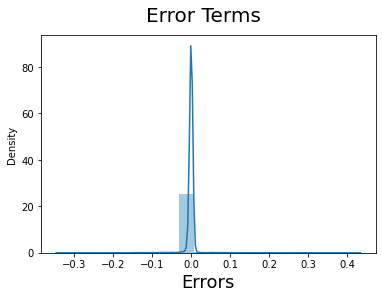

In [111]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [112]:
y_test_cnt

1        0.026650
2        0.027033
4        0.315860
6        0.027649
7        0.028367
           ...   
24061    0.027451
24062    0.026928
24063    0.026909
24064    0.027461
24065    0.026671
Length: 25281, dtype: float64

In [113]:
y_test

1        0.027135
2        0.027240
4        0.210938
6        0.027214
7        0.027865
           ...   
24061    0.027318
24062    0.026927
24063    0.027057
24064    0.027109
24065    0.027214
Name: BoilGravity, Length: 25281, dtype: float64

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression().fit(X_train, y_train)

In [126]:
y_pred = model.predict(X_train)

In [129]:
r_sq = model.score(X_train,y_train)
print(r_sq)

0.9553251897107707


In [131]:
y_pred = model.intercept_ + np.sum(model.coef_ * X_train, axis=1)

In [132]:
print(y_pred)

0        0.565900
3        0.000804
5        0.005346
13       0.003643
20       0.001574
           ...   
24036    0.004244
24038    0.008753
24041    0.002384
24048    0.001424
24056    0.004146
Length: 9099, dtype: float64


In [133]:
print(y_train)

0        0.556701
3        0.000928
5        0.002629
13       0.002990
20       0.002113
           ...   
24036    0.002784
24038    0.002732
24041    0.002835
24048    0.002010
24056    0.002732
Name: BoilGravity, Length: 9099, dtype: float64


In [135]:
model1 = LinearRegression().fit(X_test, y_test)

In [136]:
y_pred1 = model.predict(X_test)

In [137]:
r_sq = model.score(X_test,y_test)
print(r_sq)

0.9021058104259857


In [138]:
y_pred2 = model.intercept_ + np.sum(model.coef_ * X_test, axis=1)

In [139]:
y_pred2

1        0.026843
2        0.027426
4        0.316217
6        0.027415
7        0.029079
           ...   
24061    0.027545
24062    0.027139
24063    0.027052
24064    0.027477
24065    0.026204
Length: 25281, dtype: float64

In [140]:
y_test

1        0.027135
2        0.027240
4        0.210938
6        0.027214
7        0.027865
           ...   
24061    0.027318
24062    0.026927
24063    0.027057
24064    0.027109
24065    0.027214
Name: BoilGravity, Length: 25281, dtype: float64